In [1]:
import json
import matplotlib.pyplot as plt
import cv2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 1. Análise exploratória dos dados
# Carregar o dataset
with open('/content/drive/MyDrive/keypoints.json') as f:
    dataset = json.load(f)

# Visualizar a estrutura do dataset
print("Exemplo de dados do dataset:")
print(dataset)  # Assumindo que cada entrada do dataset seja um dicionário com informações da imagem e keypoints


Output hidden; open in https://colab.research.google.com to view.

In [5]:
print(dataset['images'])

{'1': '2007_000063.jpg', '2': '2007_000175.jpg', '3': '2007_000332.jpg', '4': '2007_000392.jpg', '5': '2007_000464.jpg', '6': '2007_000491.jpg', '7': '2007_000504.jpg', '8': '2007_000528.jpg', '9': '2007_000549.jpg', '10': '2007_000676.jpg', '11': '2007_000720.jpg', '12': '2007_000783.jpg', '13': '2007_000799.jpg', '14': '2007_000836.jpg', '15': '2007_000876.jpg', '16': '2007_000904.jpg', '17': '2007_000925.jpg', '18': '2007_001073.jpg', '19': '2007_001185.jpg', '20': '2007_001416.jpg', '21': '2007_001225.jpg', '22': '2007_001239.jpg', '23': '2007_001299.jpg', '24': '2007_001340.jpg', '25': '2007_001397.jpg', '26': '2007_001586.jpg', '27': '2007_001594.jpg', '28': '2007_001420.jpg', '29': '2007_001724.jpg', '30': '2007_001733.jpg', '31': '2007_001764.jpg', '32': '2007_001774.jpg', '33': '2007_001917.jpg', '34': '2007_001955.jpg', '35': '2007_002387.jpg', '36': '2007_002648.jpg', '37': '2007_003189.jpg', '38': '2007_001763.jpg', '39': '2007_003194.jpg', '40': '2007_003778.jpg', '41': '2

In [6]:
print(dataset['annotations'])

Output hidden; open in https://colab.research.google.com to view.

In [7]:
print(dataset['categories'][0]['name'])

dog


In [9]:
vacas = 0
for i in dataset['annotations']:
  if i['category_id'] == 5:
    vacas = vacas + 1

In [10]:
print(vacas)

842


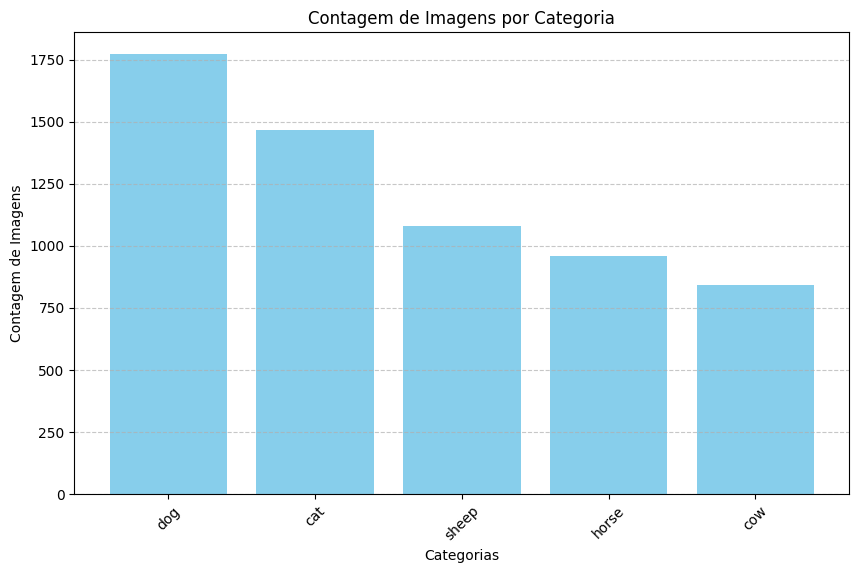

Número de imagens de cow: 842


In [11]:


# Carregar o dataset
with open('/content/drive/MyDrive/keypoints.json') as f:
    dataset = json.load(f)

# Contagem de imagens de bovinos vs. outras categorias
categorias = {}
for anotacao in dataset['annotations']:
    categoria_id = anotacao['category_id']
    categorias[categoria_id] = categorias.get(categoria_id, 0) + 1

# Extraindo o nome da categoria de bovinos
nome_categoria_bovinos = ""
for categoria in dataset['categories']:
    if categoria['id'] == 5:  # Assumindo que 5 é o ID da categoria de bovinos
        nome_categoria_bovinos = categoria['name']
        break

# Plotagem do gráfico de contagem de imagens por categoria
categorias_nomes = [categoria['name'] for categoria in dataset['categories']]
contagens = [categorias.get(categoria['id'], 0) for categoria in dataset['categories']]

plt.figure(figsize=(10, 6))
plt.bar(categorias_nomes, contagens, color='skyblue')
plt.xlabel('Categorias')
plt.ylabel('Contagem de Imagens')
plt.title('Contagem de Imagens por Categoria')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print da contagem de imagens de bovinos
print(f"Número de imagens de {nome_categoria_bovinos}: {categorias.get(5, 0)}")


In [22]:
import json
import os
import cv2
import matplotlib.pyplot as plt

# Carregar o dataset do Google Drive
with open('/content/drive/MyDrive/keypoints.json') as f:
    dataset = json.load(f)

# Verificar a estrutura do dataset
print("Exemplo de dados do dataset:")
print(type(dataset))  # Esperamos que seja um dicionário
print(dataset.keys())  # Verificar as chaves principais do dataset

print("Imagens no dataset:")
print(type(dataset['images']))  # Verificar o tipo de 'images'

if isinstance(dataset['images'], dict):
    # Se for um dicionário, pegar a primeira chave e seu valor
    first_image_key = next(iter(dataset['images']))
    first_image = dataset['images'][first_image_key]
    print(f"Primeira chave da imagem: {first_image_key}")
    print(first_image)
else:
    print("Estrutura inesperada para 'images' no dataset")

print("Anotações no dataset:")
print(type(dataset['annotations']))  # Esperamos que seja uma lista
print(dataset['annotations'][0])  # Verificar um exemplo de anotação

print("Categorias no dataset:")
print(type(dataset['categories']))  # Esperamos que seja uma lista
print(dataset['categories'][0])  # Verificar um exemplo de categoria

# Listar arquivos na pasta de imagens
image_folder = '/content/drive/MyDrive/images'
image_files = os.listdir(image_folder)

# Filtrar apenas os arquivos de imagem (se necessário)
image_files = [f for f in image_files if f.endswith(('jpg', 'jpeg', 'png'))]
print("Arquivos na pasta de imagens:")
print(image_files[:5])  # Mostrar os primeiros 5 arquivos para verificar

# Criar um dicionário para mapear nomes de arquivos de imagem para suas informações no dataset
image_info_dict = {}
for key, img in dataset['images'].items():
    if isinstance(img, dict) and 'file_name' in img:
        image_info_dict[img['file_name']] = img

# Verificar a estrutura dos itens em dataset['images']
for key, img in dataset['images'].items():
    if not isinstance(img, dict):
        print(f"Item com chave {key} não é um dicionário: {img}")

# Verificar se cada arquivo de imagem no JSON existe na pasta de imagens
associated_images = [img for img in dataset['images'].values() if isinstance(img, dict) and img['file_name'] in image_files]

# Filtrar as anotações para as imagens associadas
associated_image_ids = {img['id'] for img in associated_images}
associated_annotations = [anno for anno in dataset['annotations'] if anno['image_id'] in associated_image_ids]

# Atualizar o dataset com as imagens e anotações associadas
dataset_associado = {
    'images': associated_images,
    'annotations': associated_annotations,
    'categories': dataset['categories']
}

# Exemplo de dados associados
print("Exemplo de dados do dataset associado:")
print(dataset_associado)

# Função para desenhar keypoints na imagem
def draw_keypoints(image, keypoints, color=(0, 255, 0)):
    for i in range(0, len(keypoints), 3):
        x, y, v = keypoints[i], keypoints[i+1], keypoints[i+2]
        if v > 0:  # Se a visibilidade do keypoint for maior que 0
            cv2.circle(image, (int(x), int(y)), 5, color, -1)
    return image

# Processar a primeira imagem associada para demonstração
if len(dataset_associado['images']) > 0:
    image_info = dataset_associado['images'][0]
    image_path = os.path.join(image_folder, image_info['file_name'])

    # Carregar a imagem
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Obter os keypoints da imagem
    keypoints = None
    for anno in dataset_associado['annotations']:
        if anno['image_id'] == image_info['id']:
            keypoints = anno['keypoints']
            break

    # Desenhar os keypoints na imagem
    if keypoints:
        image_with_keypoints = draw_keypoints(image, keypoints)

    # Mostrar a imagem com keypoints
    plt.figure(figsize=(10, 10))
    plt.imshow(image_with_keypoints)
    plt.title("Imagem com Keypoints")
    plt.axis('off')
    plt.show()
else:
    print("Nenhuma imagem associada encontrada no dataset.")


Exemplo de dados do dataset:
<class 'dict'>
dict_keys(['images', 'annotations', 'categories', 'info'])
Imagens no dataset:
<class 'dict'>
Primeira chave da imagem: 1
2007_000063.jpg
Anotações no dataset:
<class 'list'>
{'image_id': 1, 'bbox': [123, 115, 379, 275], 'keypoints': [[193, 216, 1], [160, 217, 1], [174, 261, 1], [204, 186, 1], [152, 182, 1], [0, 0, 0], [0, 0, 0], [273, 168, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], [266, 225, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [190, 145, 1], [351, 238, 1]], 'num_keypoints': 20, 'category_id': 1}
Categorias no dataset:
<class 'list'>
{'supercategory': 'animal', 'id': 1, 'name': 'dog', 'keypoints': ['left_eye', 'right_eye', 'nose', 'left_ear', 'right_ear', 'left_front_elbow', 'right_front_elbow', 'left_back_elbow', 'right_back_elbow', 'left_front_knee', 'right_front_knee', 'left_back_knee', 'right_back_knee', 'left_front_paw', 'right_front_paw', 'left_back_paw', 'right_back_paw', 'throat', 'withers', 'tailbase'], '

In [23]:
import json
import os
import cv2
import matplotlib.pyplot as plt

# Carregar o dataset do Google Drive
with open('/content/drive/MyDrive/keypoints.json') as f:
    dataset = json.load(f)

# Identificar a categoria de bovinos
bovino_category_id = None
for category in dataset['categories']:
    if category['name'].lower() == 'bovino' or category['name'].lower() == 'bovine':
        bovino_category_id = category['id']
        break

if bovino_category_id is None:
    raise ValueError("Categoria de bovinos não encontrada no dataset.")

# Filtrar as anotações para bovinos
bovino_annotations = [anno for anno in dataset['annotations'] if anno['category_id'] == bovino_category_id]

# Filtrar as imagens que possuem anotações de bovinos
bovino_image_ids = {anno['image_id'] for anno in bovino_annotations}
bovino_images = [img for img in dataset['images'].values() if img['id'] in bovino_image_ids]

# Listar arquivos na pasta de imagens
image_folder = '/content/drive/MyDrive/images'
image_files = os.listdir(image_folder)

# Filtrar apenas os arquivos de imagem (se necessário)
image_files = [f for f in image_files if f.endswith(('jpg', 'jpeg', 'png'))]
print("Arquivos na pasta de imagens:")
print(image_files[:5])  # Mostrar os primeiros 5 arquivos para verificar

# Verificar se cada arquivo de imagem no JSON existe na pasta de imagens
associated_images = [img for img in bovino_images if img['file_name'] in image_files]

# Atualizar o dataset com as imagens e anotações associadas
dataset_associado = {
    'images': associated_images,
    'annotations': [anno for anno in bovino_annotations if anno['image_id'] in {img['id'] for img in associated_images}],
    'categories': [category for category in dataset['categories'] if category['id'] == bovino_category_id]
}

# Exemplo de dados associados
print("Exemplo de dados do dataset associado:")
print(dataset_associado)

# Função para desenhar keypoints na imagem
def draw_keypoints(image, keypoints, color=(0, 255, 0)):
    for i in range(0, len(keypoints), 3):
        x, y, v = keypoints[i], keypoints[i+1], keypoints[i+2]
        if v > 0:  # Se a visibilidade do keypoint for maior que 0
            cv2.circle(image, (int(x), int(y)), 5, color, -1)
    return image

# Processar a primeira imagem associada para demonstração
if len(dataset_associado['images']) > 0:
    image_info = dataset_associado['images'][0]
    image_path = os.path.join(image_folder, image_info['file_name'])

    # Carregar a imagem
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Obter os keypoints da imagem
    keypoints = None
    for anno in dataset_associado['annotations']:
        if anno['image_id'] == image_info['id']:
            keypoints = anno['keypoints']
            break

    # Desenhar os keypoints na imagem
    if keypoints:
        image_with_keypoints = draw_keypoints(image, keypoints)

    # Mostrar a imagem com keypoints
    plt.figure(figsize=(10, 10))
    plt.imshow(image_with_keypoints)
    plt.title("Imagem com Keypoints")
    plt.axis('off')
    plt.show()
else:
    print("Nenhuma imagem associada encontrada no dataset.")


ValueError: Categoria de bovinos não encontrada no dataset.